Pobranie danych pracowników oraz usunięcie kolumn i wierszy z brakami danych.

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [207]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [208]:
df.columns.tolist()

['Employee_Name',
 'EmpID',
 'MarriedID',
 'MaritalStatusID',
 'GenderID',
 'EmpStatusID',
 'DeptID',
 'PerfScoreID',
 'FromDiversityJobFairID',
 'PayRate',
 'Termd',
 'PositionID',
 'Position',
 'State',
 'Zip',
 'DOB',
 'Sex',
 'MaritalDesc',
 'CitizenDesc',
 'HispanicLatino',
 'RaceDesc',
 'DateofHire',
 'DateofTermination',
 'TermReason',
 'EmploymentStatus',
 'Department',
 'ManagerName',
 'ManagerID',
 'RecruitmentSource',
 'PerformanceScore',
 'EngagementSurvey',
 'EmpSatisfaction',
 'SpecialProjectsCount',
 'LastPerformanceReview_Date',
 'DaysLateLast30']

In [209]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

In [210]:
df.dropna(thresh=2,inplace=True)

1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

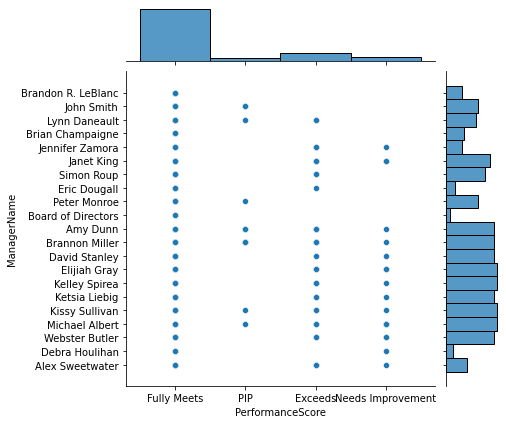

In [211]:
sns.jointplot(x='PerformanceScore',y='ManagerName',data=df)

Odp. Z powyższego wykresu nie wynika zależność pomiędzy przełożonym a wskazywaną przez niego oceną wydajności pracy. Natomiast widać, że menadżerowie najczęściej przyznają pracownikom ocenę "Fully Meets", natomiast najrzadziej "PIP".

In [212]:
df.pivot_table(index=df['ManagerName'],columns=df['PerformanceScore'],values='PerformanceScore',aggfunc='count').fillna(0)

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,2.0,6.0,1.0,0.0
Amy Dunn,3.0,15.0,1.0,2.0
Board of Directors,0.0,2.0,0.0,0.0
Brandon R. LeBlanc,0.0,7.0,0.0,0.0
Brannon Miller,7.0,9.0,1.0,4.0
Brian Champaigne,0.0,8.0,0.0,0.0
David Stanley,1.0,19.0,1.0,0.0
Debra Houlihan,0.0,2.0,1.0,0.0
Elijiah Gray,2.0,18.0,2.0,0.0


Podobny wniosek do wcześniejszego można sformułować na podstawie danych widocznych w tabeli powyżej oraz z widocznej poniżej heatmapy.

<AxesSubplot:xlabel='PerformanceScore', ylabel='ManagerName'>

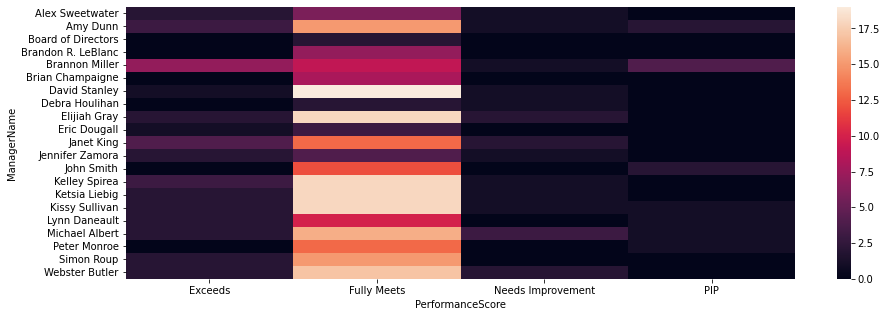

In [213]:
plt.figure(figsize=(15,5))
sns.heatmap(df.pivot_table(index=df['ManagerName'],columns=df['PerformanceScore'],values='PerformanceScore',aggfunc='count').fillna(0))

2. Jakie źródła pozyskania pracownika (RecruitmentSource) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

a) W zaimportowanych danych nie ma informacji o stażu pracy - korzystam z funkcji wyliczającej staż pracy podanej w submodule 9.2, wcześniej ujednolicając format dat.

In [214]:
df[['DateofTermination','DOB','DateofHire']].dtypes

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [215]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [216]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')

In [217]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


In [218]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [219]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [220]:
df[['DateofHire','DateofTermination','Seniority']][:10]

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.916035
1,2014-01-06,NaT,5.722226
2,2014-09-29,NaT,4.993942
3,2015-02-16,2015-04-15,0.158799
4,2015-05-01,NaT,4.408030
5,2011-09-26,2013-09-25,1.998672
6,2011-08-15,2014-08-02,2.965153
7,2014-08-18,NaT,5.108934
8,2012-02-20,NaT,7.600430
9,2014-08-18,NaT,5.108934


b) Teraz sprawdzam czy istnieje zależność pomiędzy źródłem pozyskania pracownika a stażem pracy.

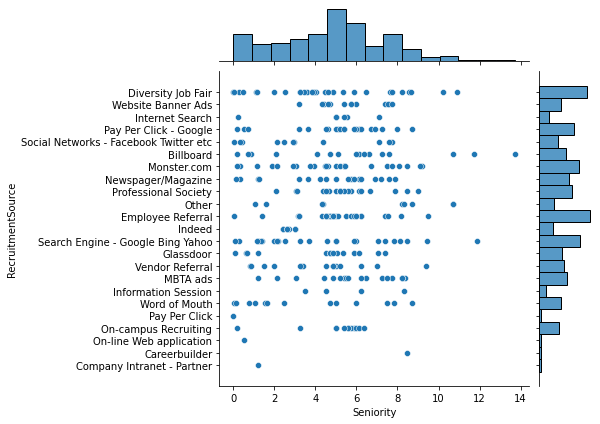

In [221]:
sns.jointplot(x='Seniority',y='RecruitmentSource',data=df)

Odp. Na powyższym wykresie nie widać wyraźnej zależności pomiędzy źródłem pozyskania pracownika, a stażem pracy. Natomiast widać, także w poniższej tabeli (procentowy udział poszczególnych źródeł rekrutacji), że naczęstszym sposobem pozyskania pracownika było "Employee Referral" - 10%, "Diversity Job Fair" - 9% i "Search Engine - Google Bing Yahoo" - 8%, natomiast "Company Intranet - Partner", "Careerbuilder" i "Careerbuilder" (po 0,3%) są małoskutecznym lub rzadko używanym narzędziem pozyskiwania pracowników.

In [222]:
df['RecruitmentSource'].value_counts(normalize=True)

Employee Referral                         0.100000
Diversity Job Fair                        0.093548
Search Engine - Google Bing Yahoo         0.080645
Monster.com                               0.077419
Pay Per Click - Google                    0.067742
Professional Society                      0.064516
Newspager/Magazine                        0.058065
MBTA ads                                  0.054839
Billboard                                 0.051613
Vendor Referral                           0.048387
Glassdoor                                 0.045161
Word of Mouth                             0.041935
Website Banner Ads                        0.041935
On-campus Recruiting                      0.038710
Social Networks - Facebook Twitter etc    0.035484
Other                                     0.029032
Indeed                                    0.025806
Internet Search                           0.019355
Information Session                       0.012903
Pay Per Click                  

3. Czy stan cywilny (MaritalDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

<AxesSubplot:xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

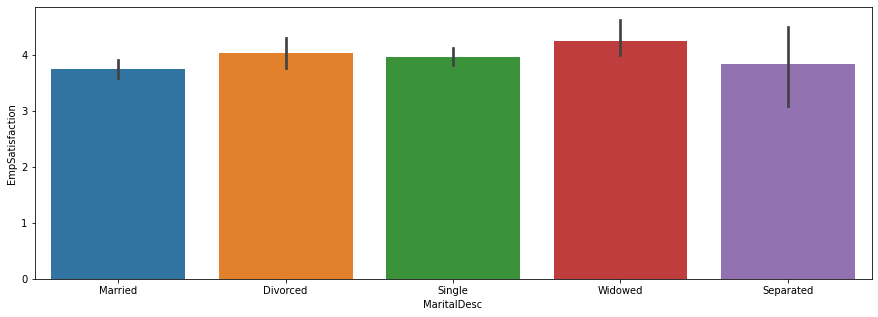

In [223]:
plt.figure(figsize=(15,5))
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

Odp. Z powyższego wykresu wynika, że zadowolenie pracowników jest na zbliżonym poziomie bez względu na stan cywilny.

Jeśli występowałyby spore rozbieżności w poziomie zadowolenia z pracy w poszczególnych kategoriach stanu cywilnego należałoby zbadać liczebność poszczególnych rodzajów kategorii "MaritalDesc" i wyłączyć z analizy te niereprezentatywne (o niskiej ilości), gdyż mogłyby fałszować wynik (prowadzić do błędnych wniosków).

Z ciekawości dodatkowo przeanalizowałam ilość pracowników w danej kategorii "MaritalDesc" - z poniższej tabeli i wykresu wynika, że najwięcej pracowników jest w stanie "Single" i "Married".

In [224]:
df['MaritalDesc'].value_counts()

Single       137
Married      123
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

<AxesSubplot:xlabel='MaritalDesc', ylabel='count'>

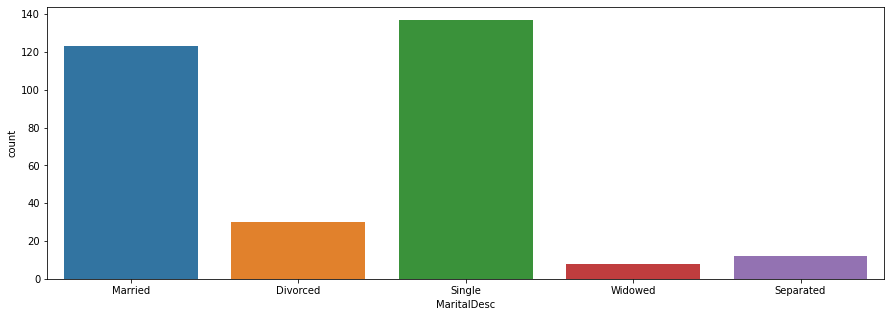

In [225]:
plt.figure(figsize=(15,5))
sns.countplot(x='MaritalDesc',data=df)

4. Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

a) W zaimportowanych danych nie ma informacji o wieku pracowników, który wyliczam w dodatkowej kolumnie, wcześniej ujednolicając format dat.

In [226]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')

In [227]:
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


In [228]:
import datetime as dt

def count_age(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
#     else:
#         end_date = row['DateofTermination']

        return (end_date - row['DOB'])/np.timedelta64(1,'Y')

In [229]:
df['Age'] = df.apply(lambda row: count_age(row),axis=1)

In [230]:
df[['DateofHire','DateofTermination','DOB','Age']][:10]

,DateofHire,DateofTermination,DOB,Age
0,2008-10-27,NaT,1987-11-24,31.841858
1,2014-01-06,NaT,1984-04-26,35.420303
2,2014-09-29,NaT,1986-09-01,33.071179
3,2015-02-16,2015-04-15,1985-09-16,NaN
4,2015-05-01,NaT,1988-05-19,31.357249
5,2011-09-26,2013-09-25,1987-06-14,NaN
6,2011-08-15,2014-08-02,2064-06-01,NaN
7,2014-08-18,NaT,2063-05-15,-43.631286
8,2012-02-20,NaT,1987-05-14,32.373012
9,2014-08-18,NaT,1988-09-14,31.034176


b) Na histogramie przedstawiam strukturę wieku aktualnie zatrudnionych pracowników.

C:\Users\marta.zegota\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

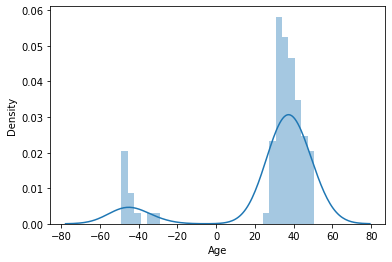

In [232]:
sns.distplot(dff['Age'])

Odp. Z powyższego histogramu wynika, że większość pracowników jest wieku pomiędzy 30 a 40 lat. Pojawiały się przypadki wieku ujemnego, co jest spowodowane błędnie podanymi w bazie datami urodzenia ('DOB'), np. 2063-05-15.

5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

a) Wyłączam z analizy rekordy, w których znajdują się ujemne wartoście w kolumnie "Age" i brak wartości w kolumnie "SpecialProjectsCount".

In [233]:
dfff = dff[(dff['Age'] > 0) & (dff['SpecialProjectsCount'] != 'NaN')]

b) Na wykresie przestawiam zależność wieku pracowników od prowadzonych przez nich liczby specjalnych projektów.

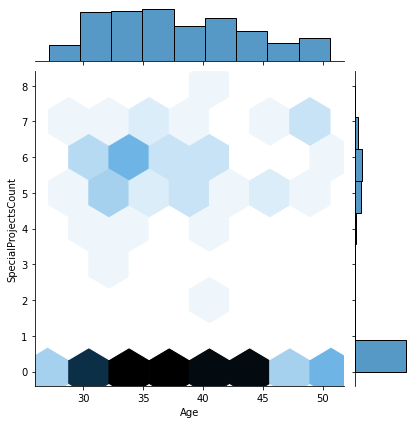

In [234]:
sns.jointplot(x='Age',y='SpecialProjectsCount',data=dfff,kind='hex')

In [235]:
dff['SpecialProjectsCount'].value_counts()

0.0    242
6.0     21
5.0     21
7.0     12
4.0      9
3.0      2
8.0      2
2.0      1
Name: SpecialProjectsCount, dtype: int64

Odp. Na podstawie wykresu ciężko stwierdzić korelację pomiędzy badanymi zmiennymi - ciemniejsze sześciokąty wskazujące 5-6 projektów pojawiły się przy pracownikach w wieku 30-35 lat, co może wynikać z tego, że większość zatrudnionych w firmie pracowników to osoby pomiędzy 30 a 40 rokiem życia.
Natomiast dolny rząd bardzo ciemnych sześciokątów nie wskazuje na żadną zależność, lecz informuje o relatywnie sporej ilości pracowników w wieku pomiędzy 30 a 45 lat, którym nie przydzielono żadnego specjalnego projektu.